<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/quickstarts/02_osm_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> - Stasja's notebook

In [1]:
!pip install osmnx geopy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 1.7 MB/s eta 0:00:00


In [2]:
import geopandas
import matplotlib.pyplot as plt
import osmnx
import seaborn as sns
from shapely.geometry import Point, LineString

sns.set_style(style="dark")

### 🕸 Street network

In [3]:
PLACE_NAME = "Vila de Gracia, Barcelona, Spain"
graph = osmnx.graph_from_place(PLACE_NAME)

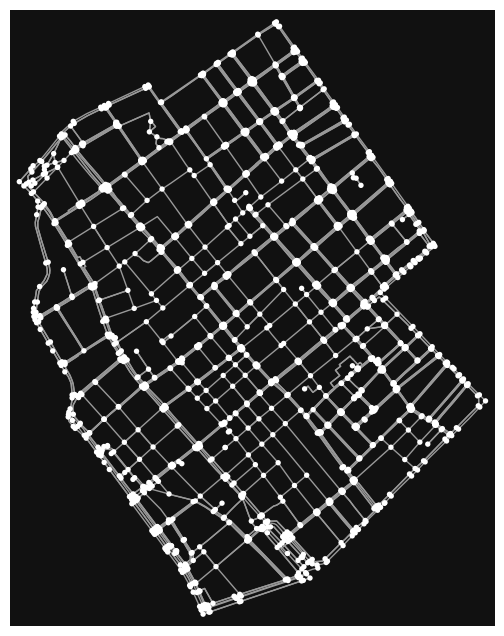

In [4]:
# showing our street network

figure, ax = osmnx.plot_graph(graph)

### 🕍 Building footprints

We can retrieve places information as well (buildings, parks, amenities etc). The data that we retrieve is a dataframe, like the ones we worked with during the previous term:

In [5]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

buildings.head()

<ipython-input-5-25295188f309>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = osmnx.geometries_from_place(
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_sp

addr:city addr:housenumber addr:postcode addr:street  \
element_type osmid                                                             
node         4675120818       NaN              NaN         08012         NaN   
             5485540653       NaN              NaN           NaN         NaN   
             5485540654       NaN              NaN           NaN         NaN   
             5485540655       NaN              NaN           NaN         NaN   
             5485540656       NaN              NaN           NaN         NaN   

                        amenity entrance  \
element_type osmid                         
node         4675120818     NaN      NaN   
             5485540653     NaN      NaN   
             5485540654     NaN      NaN   
             5485540655     NaN      NaN   
             5485540656     NaN      NaN   

                                                            name  \
element_type osmid                                                 
node         4675120818  Refugi Antiaeri de la Plaça del Diamant   
             5485540653                                      NaN   
             5485540654                                      NaN   
             5485540655                                      NaN   
             5485540656                                      NaN   

                                phone                  geometry addr:country  \
element_type osmid                                                             
node         4675120818  +34932196134  POINT (2.15606 41.40407)          NaN   
             5485540653           NaN  POINT (2.15342 41.39904)          NaN   
             5485540654           NaN  POINT (2.15315 41.39911)          NaN   
             5485540655           NaN  POINT (2.15272 41.39968)          NaN   
             5485540656           NaN  POINT (2.15295 41.39929)          NaN   

                         ...  dog elevator pets ways type construction  \
element_type osmid       ...                                             
node         4675120818  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540653  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540654  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540655  ...  NaN      NaN  NaN  NaN  NaN          NaN   
             5485540656  ...  NaN      NaN  NaN  NaN  NaN          NaN   

                        residential community_centre:for service_times  \
element_type osmid                                                       
node         4675120818         NaN                  NaN           NaN   
             5485540653         NaN                  NaN           NaN   
             5485540654         NaN                  NaN           NaN   
             5485540655         NaN                  NaN           NaN   
             5485540656         NaN                  NaN           NaN   

                        castle_type  
element_type osmid                   
node         4675120818         NaN  
             5485540653         NaN  
             5485540654         NaN  
             5485540655         NaN  
             5485540656         NaN  

[5 rows x 124 columns]

<Axes: >

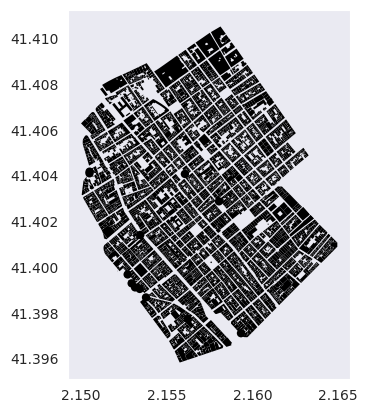

In [6]:
buildings.plot(color="black", edgecolor="none")

### 🍽 Other data extraction

There is a lot more data that can be extracted, like parks, amenities and more! See the entire list [here](https://wiki.openstreetmap.org/wiki/Map_features).

In [24]:
defibrillator = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "emergency": "defibrillator"
    }
)
defibrillator.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-076c59618a0b>:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  defibrillator = osmnx.geometries_from_place(


defibrillator:access         defibrillator:location  \
element_type osmid                                                            
node         3397396601                  yes  andana direcció Trinitat Nova   
             4743944868                  NaN                            NaN   
             5312707126                  yes  andana direcció Trinitat Nova   
             6356179087                  NaN                            NaN   
             8170960947                  NaN                        entrada   

                         defibrillator:location:en  \
element_type osmid                                   
node         3397396601  platform to Trinitat Nova   
             4743944868                        NaN   
             5312707126  platform to Trinitat Nova   
             6356179087                        NaN   
             8170960947                        NaN   

                        defibrillator:wheelchair:access      emergency  \
element_type osmid                                                       
node         3397396601                             yes  defibrillator   
             4743944868                             NaN  defibrillator   
             5312707126                             yes  defibrillator   
             6356179087                             NaN  defibrillator   
             8170960947                             NaN  defibrillator   

                        emergency:fire_extinguisher indoor  \
element_type osmid                                           
node         3397396601                         yes    yes   
             4743944868                         NaN    NaN   
             5312707126                         yes    NaN   
             6356179087                         NaN    yes   
             8170960947                         NaN    yes   

                                                  name  name:ca  \
element_type osmid                                                
node         3397396601                        Fontana  Fontana   
             4743944868  Cambra de Comerç de Barcelona      NaN   
             5312707126                        Lesseps  Lesseps   
             6356179087                            NaN      NaN   
             8170960947                            NaN      NaN   

                                    network  ... wheelchair  wikidata  \
element_type osmid                           ...                        
node         3397396601  Metro de Barcelona  ...        yes   Q535545   
             4743944868                 NaN  ...        NaN  Q8353073   
             5312707126  Metro de Barcelona  ...        yes   Q979398   
             6356179087                 NaN  ...        NaN       NaN   
             8170960947                 NaN  ...        NaN       NaN   

                                                                 wikipedia  \
element_type osmid                                                           
node         3397396601                              ca:Estació de Fontana   
             4743944868  ca:Cambra Oficial de Comerç, Indústria i Naveg...   
             5312707126                              ca:Estació de Lesseps   
             6356179087                                                NaN   
             8170960947                                                NaN   

                                         geometry  check_date      government  \
element_type osmid                                                              
node         3397396601  POINT (2.15300 41.40210)         NaN             NaN   
             4743944868  POINT (2.15774 41.39641)  2023-10-11  administrative   
             5312707126  POINT (2.14984 41.40644)         NaN             NaN   
             6356179087  POINT (2.15493 41.39766)         NaN             NaN   
             8170960947  POINT (2.15783 41.39996)         NaN             NaN   

                             office     

### 🎢 Putting it all together in one map

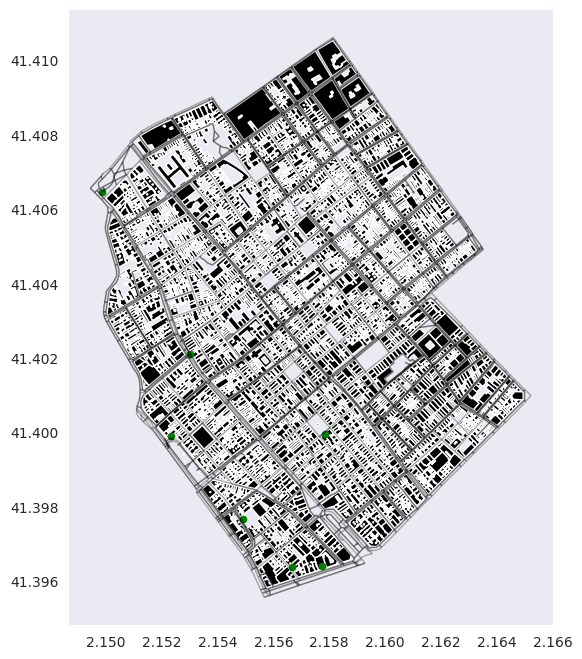

In [27]:
figure, ax = plt.subplots(figsize=(12,8))

building_pol = buildings[buildings.geometry.type == 'Polygon']
# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
defibrillator.plot(ax=ax, color="green", markersize=20)

plt.show()

### 📍Mapping our own place

There are several ways to map our place on the map:

1. placing a point when we know the exact coordinates
2. finding place's coordinates via [geocoding](https://nominatim.org/)

#### 📍Placing a point by its coordinates

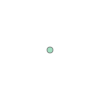

In [31]:
coords = (2.156876550369392,41.40406226555155)
p = Point(coords)
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

In [32]:
print(p.x, p.y)

2.156876550369392 41.40406226555155


In [33]:
geom = geopandas.GeoDataFrame(
    {
        "geometry": [p],
    },
    crs=edges.crs
)

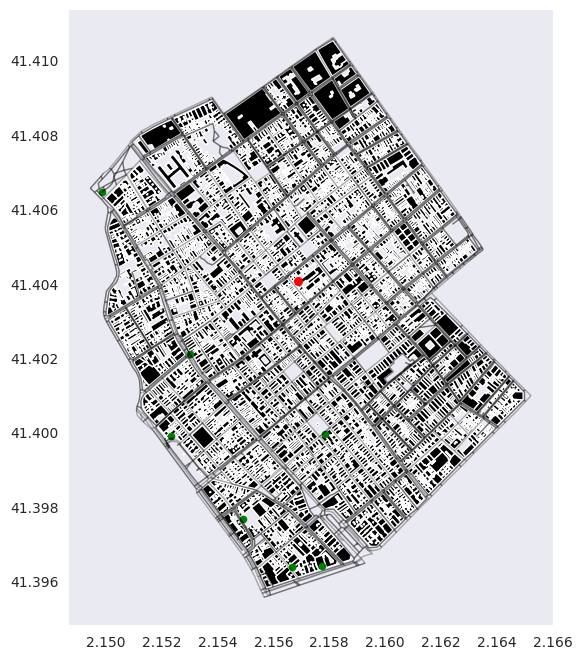

In [36]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
defibrillator.plot(ax=ax, facecolor="green", markersize=20)

# Plot IAAC
geom.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

#### ㊙️ Geocoding: name to coordinates

In [39]:
our_place = "Verdi Barcelona"  # "Institute for Advanced Architecture of Catalonia"
geocoded_addresses = geopandas.tools.geocode(
    [our_place],
    provider="nominatim",
    user_agent="autogis2023",
    timeout=10
)
geocoded_addresses.head()

geometry                                            address
0  POINT (2.15688 41.40401)  Cines Verdi Barcelona, 32, Carrer de Verdi, la...

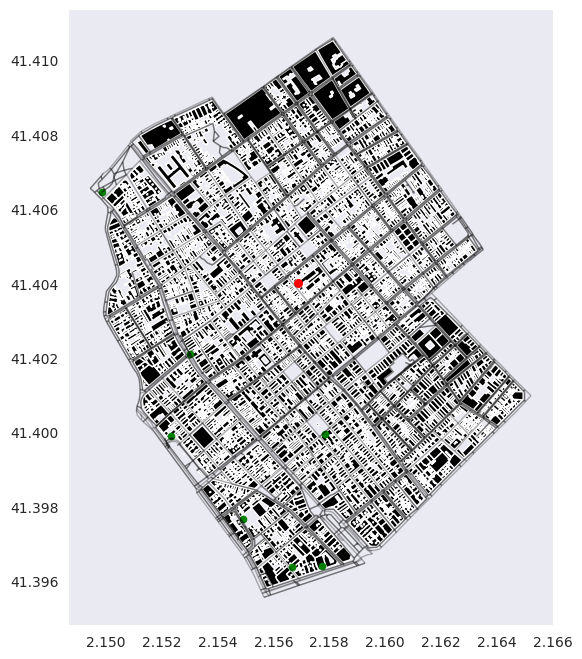

In [40]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")



# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
defibrillator.plot(ax=ax, facecolor="green", markersize=20)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)


plt.show()

### 📐 Geometrical operations

A list of possible geometrical operations can be found in [shapely documentation](https://shapely.readthedocs.io/en/stable/geometry.html).

Let's check how many restaurants lie within 4 minutes fast walk (0.5 km). 1km is around 0.008 degrees

In [48]:
rad = p.buffer(0.008 * 0.75)  # making offset of 1.5 km from our point of interest

rad = geopandas.GeoDataFrame(
    {
        "geometry": [rad],
    },
    crs=building_pol.crs
)

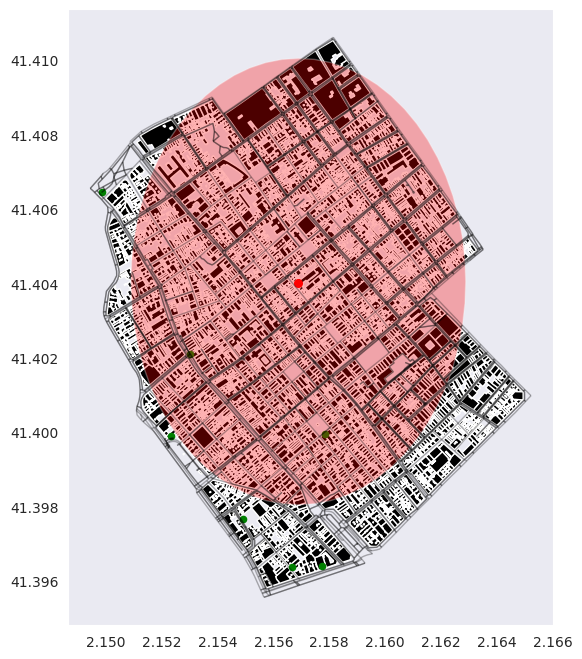

In [49]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
defibrillator.plot(ax=ax, facecolor="green", markersize=20)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=30)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

plt.show()

In [50]:
accessible_defibrillators = [d for d in defibrillator["geometry"] if isinstance(d, Point) and d.within(rad["geometry"][0])]
accessible_defibrillators = rad = geopandas.GeoDataFrame(
    {
        "geometry": accessible_defibrillators,
    },
    crs=building_pol.crs
)

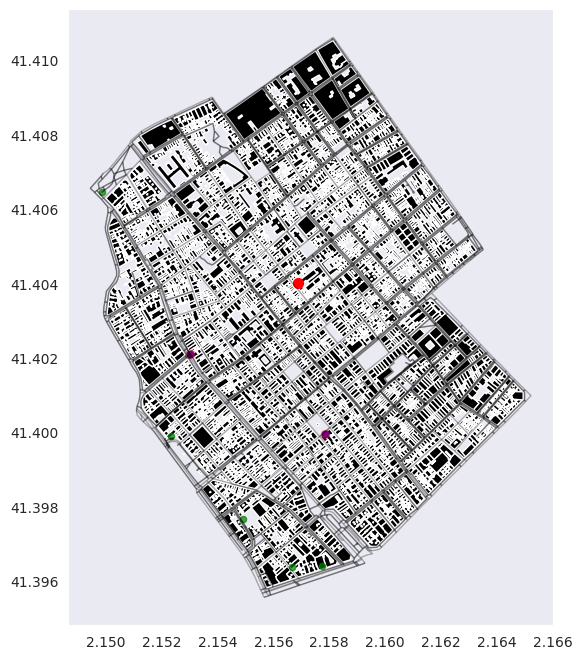

In [51]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")

# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

# Plot restaurants
defibrillator.plot(ax=ax, facecolor="green", markersize=20, alpha=0.7)

# Plot IAAC
geocoded_addresses.plot(ax=ax, facecolor="red", markersize=50)
rad.plot(ax=ax, linewidth=1, facecolor="red", alpha=0.3)

accessible_defibrillators.plot(ax=ax, facecolor="purple", markersize=20, alpha=1.0)

plt.show()

### 🕸 Network Analysis

With osmnx we can get statistics necessary for urban analysis within a defined area. Let's define our area as a polygon:

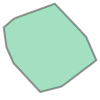

In [52]:
zone = edges.unary_union.convex_hull
zone

In [53]:
stats = osmnx.basic_stats(graph, area=zone.area)
stats

{'n': 1698,
 'm': 4616,
 'k_avg': 5.4369846878680805,
 'edge_length_total': 125913.56000000016,
 'edge_length_avg': 27.277634315424645,
 'streets_per_node_avg': 3.4210836277974086,
 'streets_per_node_counts': {0: 0, 1: 36, 2: 3, 3: 873, 4: 782, 5: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.02120141342756184,
  2: 0.0017667844522968198,
  3: 0.5141342756183745,
  4: 0.46054181389870436,
  5: 0.002355712603062426},
 'intersection_count': 1662,
 'street_length_total': 79844.23300000017,
 'street_segment_count': 2828,
 'street_length_avg': 28.233462871287188,
 'circuity_avg': 1.0167060044445906,
 'self_loop_proportion': 0.0003536067892503536,
 'node_density_km': 11209942037118.838,
 'intersection_density_km': 10972275421490.877,
 'edge_density_km': 831262490746340.9,
 'street_density_km': 527119684292233.8}

What do these stats mean?

[Link](https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.stats)

#### 〽️ Shortest route

In [57]:
coords = (2.156876550369392,41.40406226555155)
origin = Point(coords)

coords2 = (2.1529951,41.4021018)
destination = Point(coords2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
origin = (
    osmnx.geocode_to_gdf("Verdi Barcelona")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Jardins de l'Arenal de Llevant")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

TypeError: Nominatim could not geocode query 'Cines Verdi Barcelona' to a geometry of type (Multi)Polygon

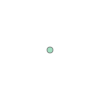

In [58]:
origin

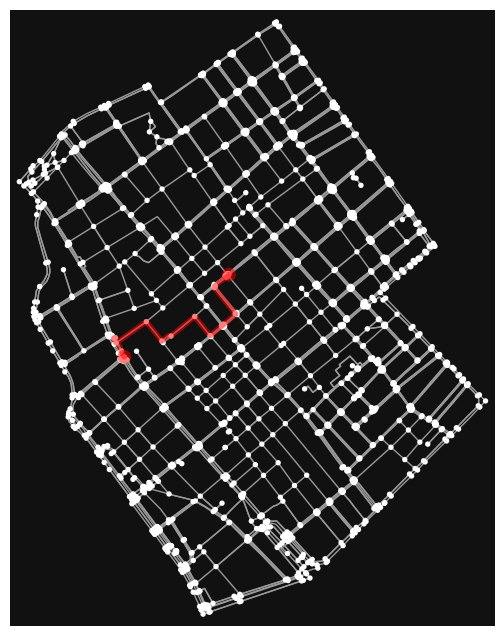

In [59]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)

# calculating the shortest path:
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)

# plotting the projection
fig, ax = osmnx.plot_graph_route(graph, route)

In [60]:
route_nodes = nodes.loc[route]
route_line = LineString(
    list(route_nodes.geometry.values)
)
route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom.length

<ipython-input-60-3f1016416ab9>:14: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  route_geom.length


0    0.007247
dtype: float64

### 🕸 Walkability analysis

How far can you reach from a place on foot?

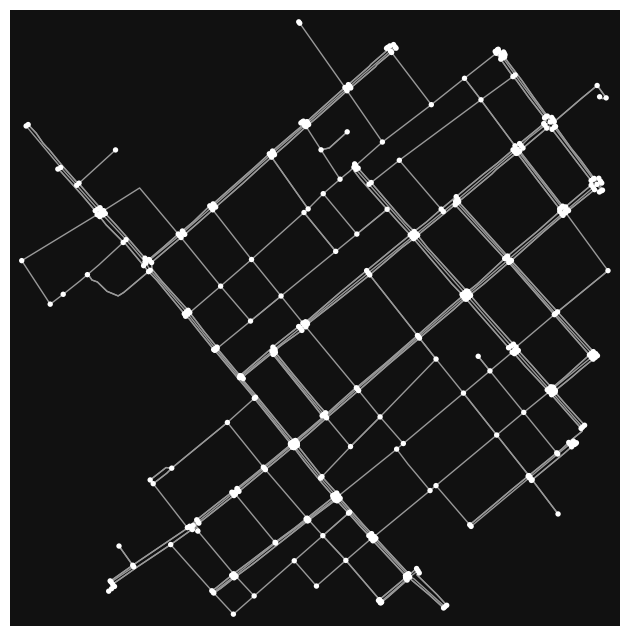

In [61]:
# getting iaac node from the graph:
iaac_node = osmnx.distance.nearest_nodes(graph, p.x, p.y, return_dist=False)

# cutting the graph to hold 1km distance from the node only:
g = osmnx.truncate.truncate_graph_dist(graph, iaac_node, max_dist=500)
figure, ax = osmnx.plot_graph(g)


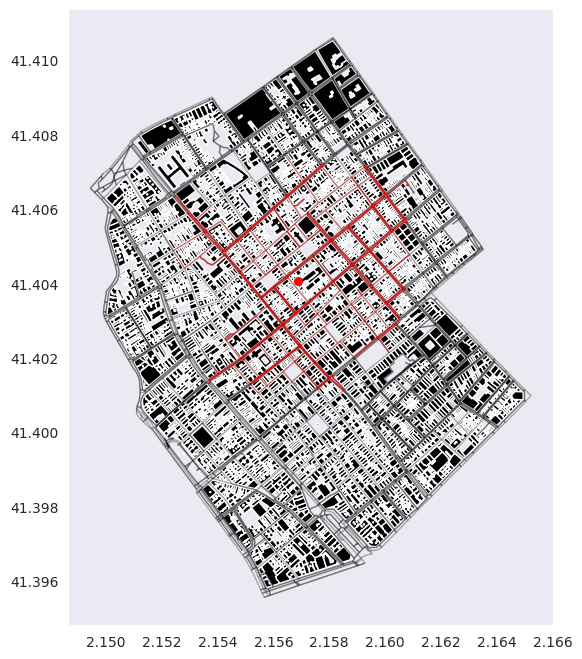

In [62]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


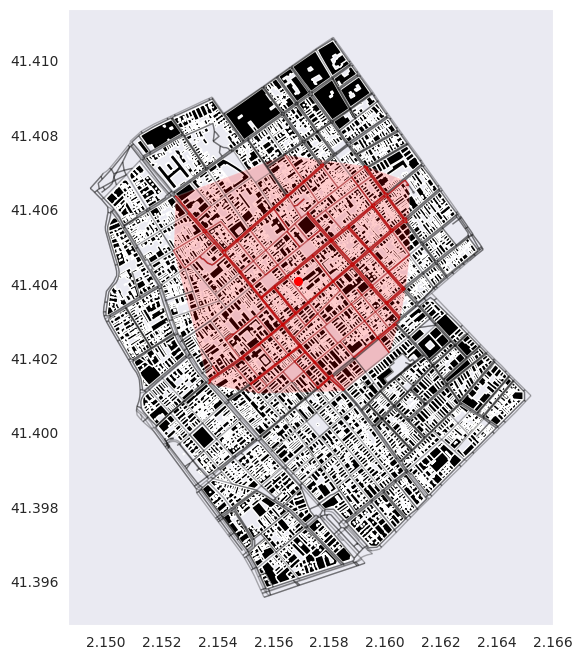

In [64]:
figure, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
building_pol.plot(ax=ax, facecolor="black")
geom.plot(ax=ax, facecolor="red", markersize=30)


# Plot street ‘edges’
nodes, edges = osmnx.graph_to_gdfs(graph)
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)

nodes1, edges1 = osmnx.graph_to_gdfs(g)
edges1.plot(ax=ax, linewidth=1, edgecolor="red", alpha=0.3)

walkable_zone = edges1.unary_union.convex_hull

w_zone_mapped = geopandas.GeoDataFrame(
    {
        "geometry": [walkable_zone],
    },
    crs=building_pol.crs
)

w_zone_mapped.plot(ax=ax, facecolor="red", alpha=0.2)


plt.show()

### 🧬 Resources

* [Downloading data for entire countries / continents](https://download.geofabrik.de/)
* [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html)
* [OSMNX](https://osmnx.readthedocs.io/en/stable/user-reference.html)
* [shapely](https://shapely.readthedocs.io/en/stable/geometry.html)

This notebook is based on the material from [Automating GIS processes course 2023](https://autogis-site.readthedocs.io/en/latest/course-info/general-information.html) from [University of Helsinki](https://www.helsinki.fi/sv) by Henrikki Tenkanen, Vuokko Heikinheimo and Håvard Wallin Aagesen.

Materials taken from the course belong mostly to the [Lesson 3 Geocoding](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding.html) and [Lesson 6 Retrieving data from OSM and Network Analysis](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-6/overview.html). Material was adapted for the purposes of this course by changing the location in the example as well as adding calculation of walking distance from a given point.


Thanks to them for maintaining [the course repo](https://github.com/Automating-GIS-processes/site/) and improving the material from year to year.